# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Arvel Adelar Budiono
- **Email:** arvelbudion01@gmail.com
- **ID Dicoding:** arvel_budiono

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi penjualan produk di e-commerce?
- Bagaimana performa sellers dalam penggunaan e-commerce?

## Import Semua Packages/Library yang Digunakan

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [51]:
customers_df = pd.read_csv('/content/e-commerce-public-dataset/customers_dataset.csv')
products_df = pd.read_csv('/content/e-commerce-public-dataset/products_dataset.csv')
product_categories_df = pd.read_csv('/content/e-commerce-public-dataset/product_category_name_translation.csv')
order_items_df = pd.read_csv('/content/e-commerce-public-dataset/order_items_dataset.csv')
sellers_df = pd.read_csv('/content/e-commerce-public-dataset/sellers_dataset.csv')

**Insight:**
- Membaca dataset dengan format .csv dengan menggunakan pandas
- Menginisialisasikan dataset ke dalam sebuah variabel dengan pandas dataframe
- Terdapat lima dataset yang digunakan yakni customers, products, product_categories, order_items, dan sellers

### Assessing Data

In [52]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [53]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [54]:
products_df.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [55]:
product_categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [56]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [57]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


**Insight:**
- Menampilkan isi dari setiap dataset yang digunakan
- Mengidentifikasi apakah terdapat null value dalam dataset

### Cleaning Data

In [58]:
products_df.dropna(inplace = True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


**Insight:**
- Menghapus baris dalam dataset product yang memiliki null value pada kolom product_category_name
- Bertujuan untuk menggabungkan dataset product dan product categories

## Exploratory Data Analysis (EDA)

### Melakukan eksplorasi data untuk menjawab pertanyaan bisnis di atas
- Menggabungkan dataset product, product_categories, dan order_items untuk mengetahui jumlah produk yang terjual pada masing-masing kategori
- Menggabungkan dataset seller, dan order_items untuk mengetahui performa penjual dalam penjualan yang dilakukan berdasarkan kotanya

In [59]:
products_product_categories_df = pd.merge(
    left = product_categories_df,
    right = products_df,
    how = 'inner',
    left_on = 'product_category_name',
    right_on = 'product_category_name'
)
products_product_categories_df.head()

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,beleza_saude,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0
1,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0
2,beleza_saude,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0
3,beleza_saude,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0
4,beleza_saude,health_beauty,75b4372e69a42f8ae1d908c076f547b2,22.0,1313.0,1.0,938.0,29.0,22.0,23.0


In [60]:
products_product_categories_order_items_df = pd.merge(
    left = products_product_categories_df,
    right = order_items_df,
    how = 'inner',
    left_on = 'product_id',
    right_on = 'product_id'
)
products_product_categories_order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111022 entries, 0 to 111021
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_category_name          111022 non-null  object 
 1   product_category_name_english  111022 non-null  object 
 2   product_id                     111022 non-null  object 
 3   product_name_lenght            111022 non-null  float64
 4   product_description_lenght     111022 non-null  float64
 5   product_photos_qty             111022 non-null  float64
 6   product_weight_g               111022 non-null  float64
 7   product_length_cm              111022 non-null  float64
 8   product_height_cm              111022 non-null  float64
 9   product_width_cm               111022 non-null  float64
 10  order_id                       111022 non-null  object 
 11  order_item_id                  111022 non-null  int64  
 12  seller_id                     

In [61]:
sum_products_df = products_product_categories_order_items_df.groupby(by = ['product_category_name', 'product_category_name_english']).agg({
    'product_id': 'count'
}).reset_index().sort_values(by = 'product_id', ascending = False)
sum_products_df.head()

,product_category_name,product_category_name_english,product_id
13,cama_mesa_banho,bed_bath_table,11115
11,beleza_saude,health_beauty,9670
32,esporte_lazer,sports_leisure,8641
54,moveis_decoracao,furniture_decor,8334
44,informatica_acessorios,computers_accessories,7827


In [62]:
sellers_order_items_df = pd.merge(
    left = sellers_df,
    right = order_items_df,
    how = 'inner',
    left_on = 'seller_id',
    right_on = 'seller_id'
)
sellers_order_items_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89


In [63]:
sum_sellers_df = sellers_order_items_df.groupby(by = 'seller_city').agg({
    'product_id': 'count',
    'order_item_id': 'count',
    'price': 'sum'
}).reset_index().sort_values(by = ['price'], ascending = False)
sum_sellers_df.head()

,seller_city,product_id,order_item_id,price
517,sao paulo,27983,27983,2702878.14
227,ibitinga,7750,7750,624592.94
159,curitiba,3016,3016,470759.82
450,rio de janeiro,2442,2442,358413.59
220,guarulhos,2362,2362,329494.38


**Insight:**
- Mengetahui produk mana yang paling sering terjual dan tidak terjual berdasarkan kategorinya
- Mengetahui performa setiap penjual berdasarkan kotanya, baik jumlah produk terjual, jumlah transaksi, dan omset

## Visualization & Explanatory Analysis

### Pertanyaan 1:

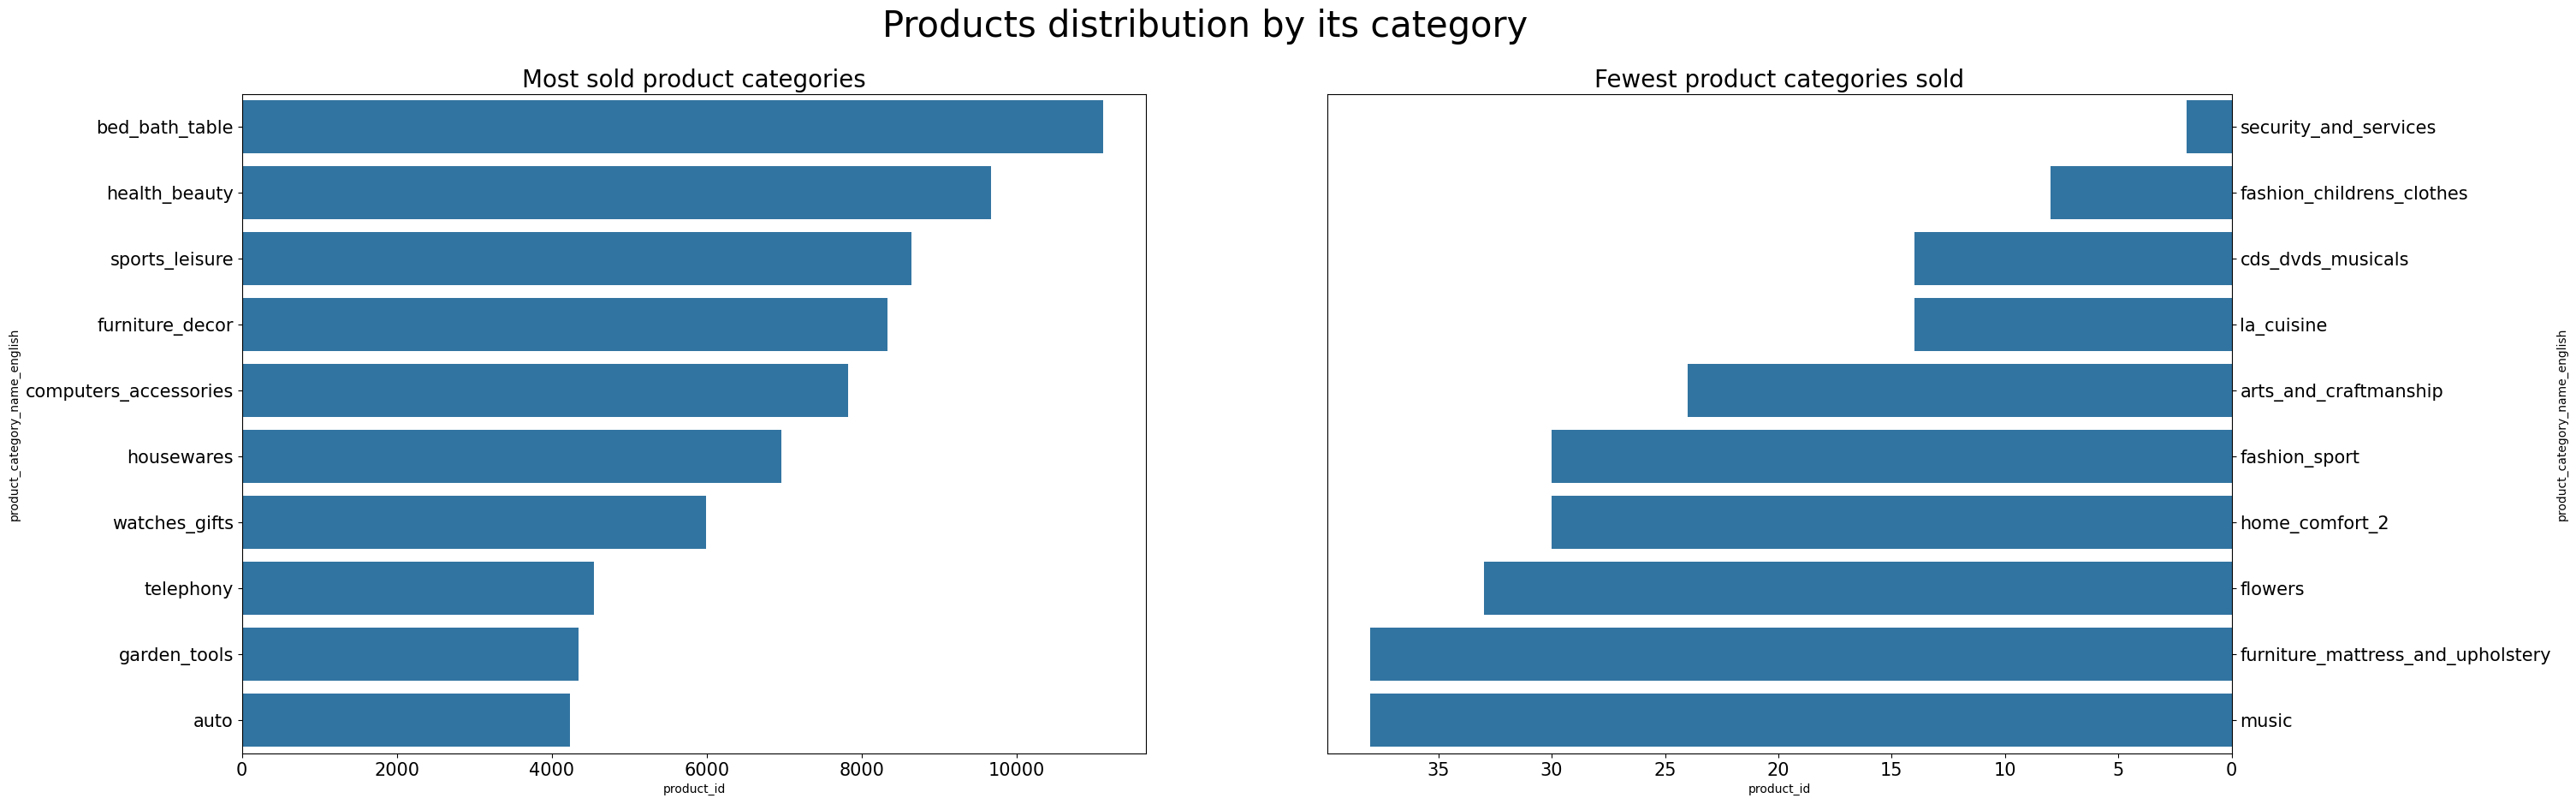

In [64]:
fig, ax = plt.subplots(figsize = (30,10), ncols = 2, nrows = 1)

sns.barplot(
    x = 'product_id',
    y = 'product_category_name_english',
    data = sum_products_df.sort_values(by = 'product_id', ascending = False).head(10),
    ax = ax[0]
)

ax[0].tick_params(axis = 'x', labelsize = 15)
ax[0].tick_params(axis = 'y', labelsize = 15)
ax[0].set_title('Most sold product categories', loc = 'center', fontsize = 20)

sns.barplot(
    x = 'product_id',
    y = 'product_category_name_english',
    data = sum_products_df.sort_values(by = 'product_id', ascending = True).head(10),
    ax = ax[1]
)

ax[1].tick_params(axis = 'x', labelsize = 15)
ax[1].tick_params(axis = 'y', labelsize = 15)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title('Fewest product categories sold', loc = 'center', fontsize = 20)

plt.suptitle("Products distribution by its category", fontsize=30)
plt.show(fig)

### Pertanyaan 2:

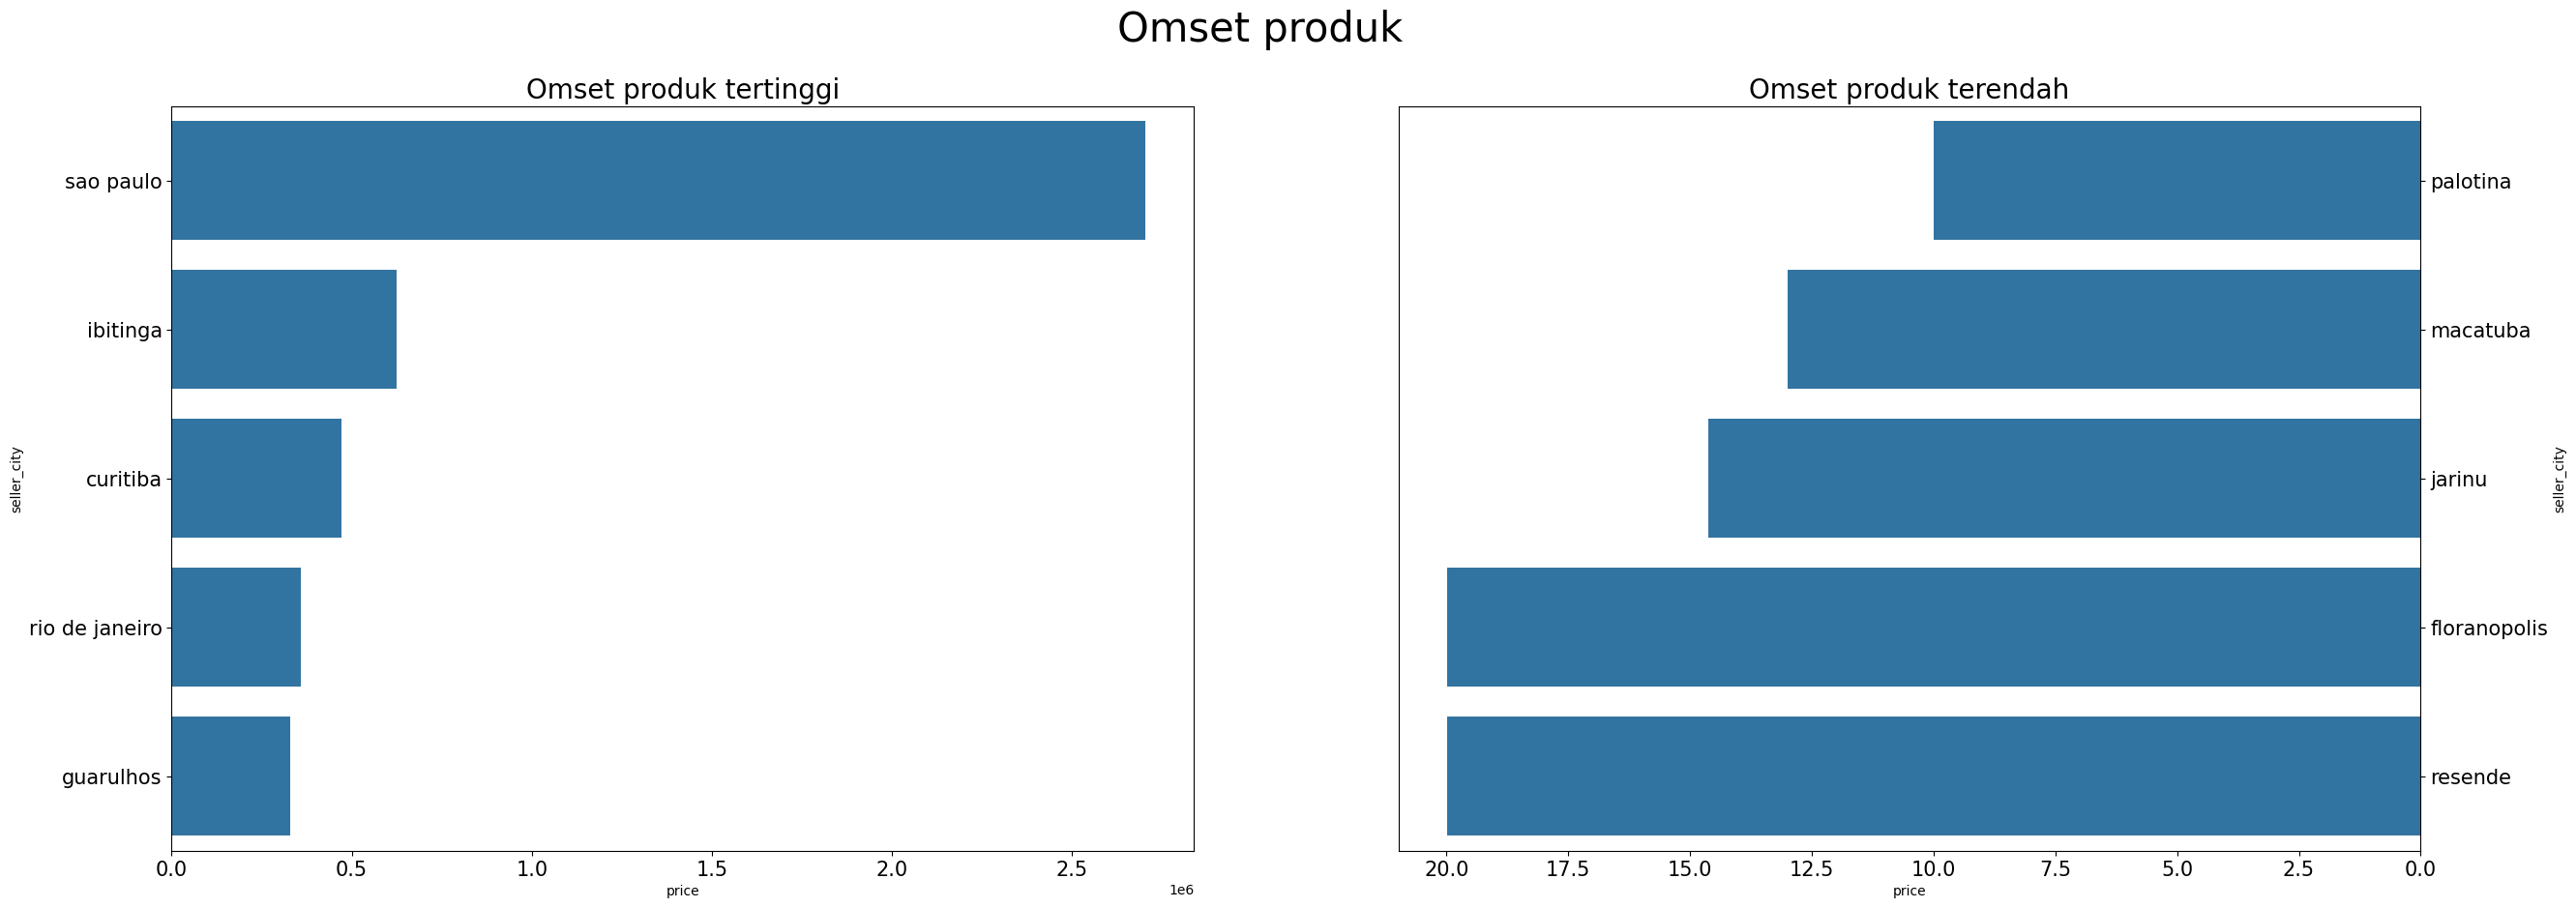

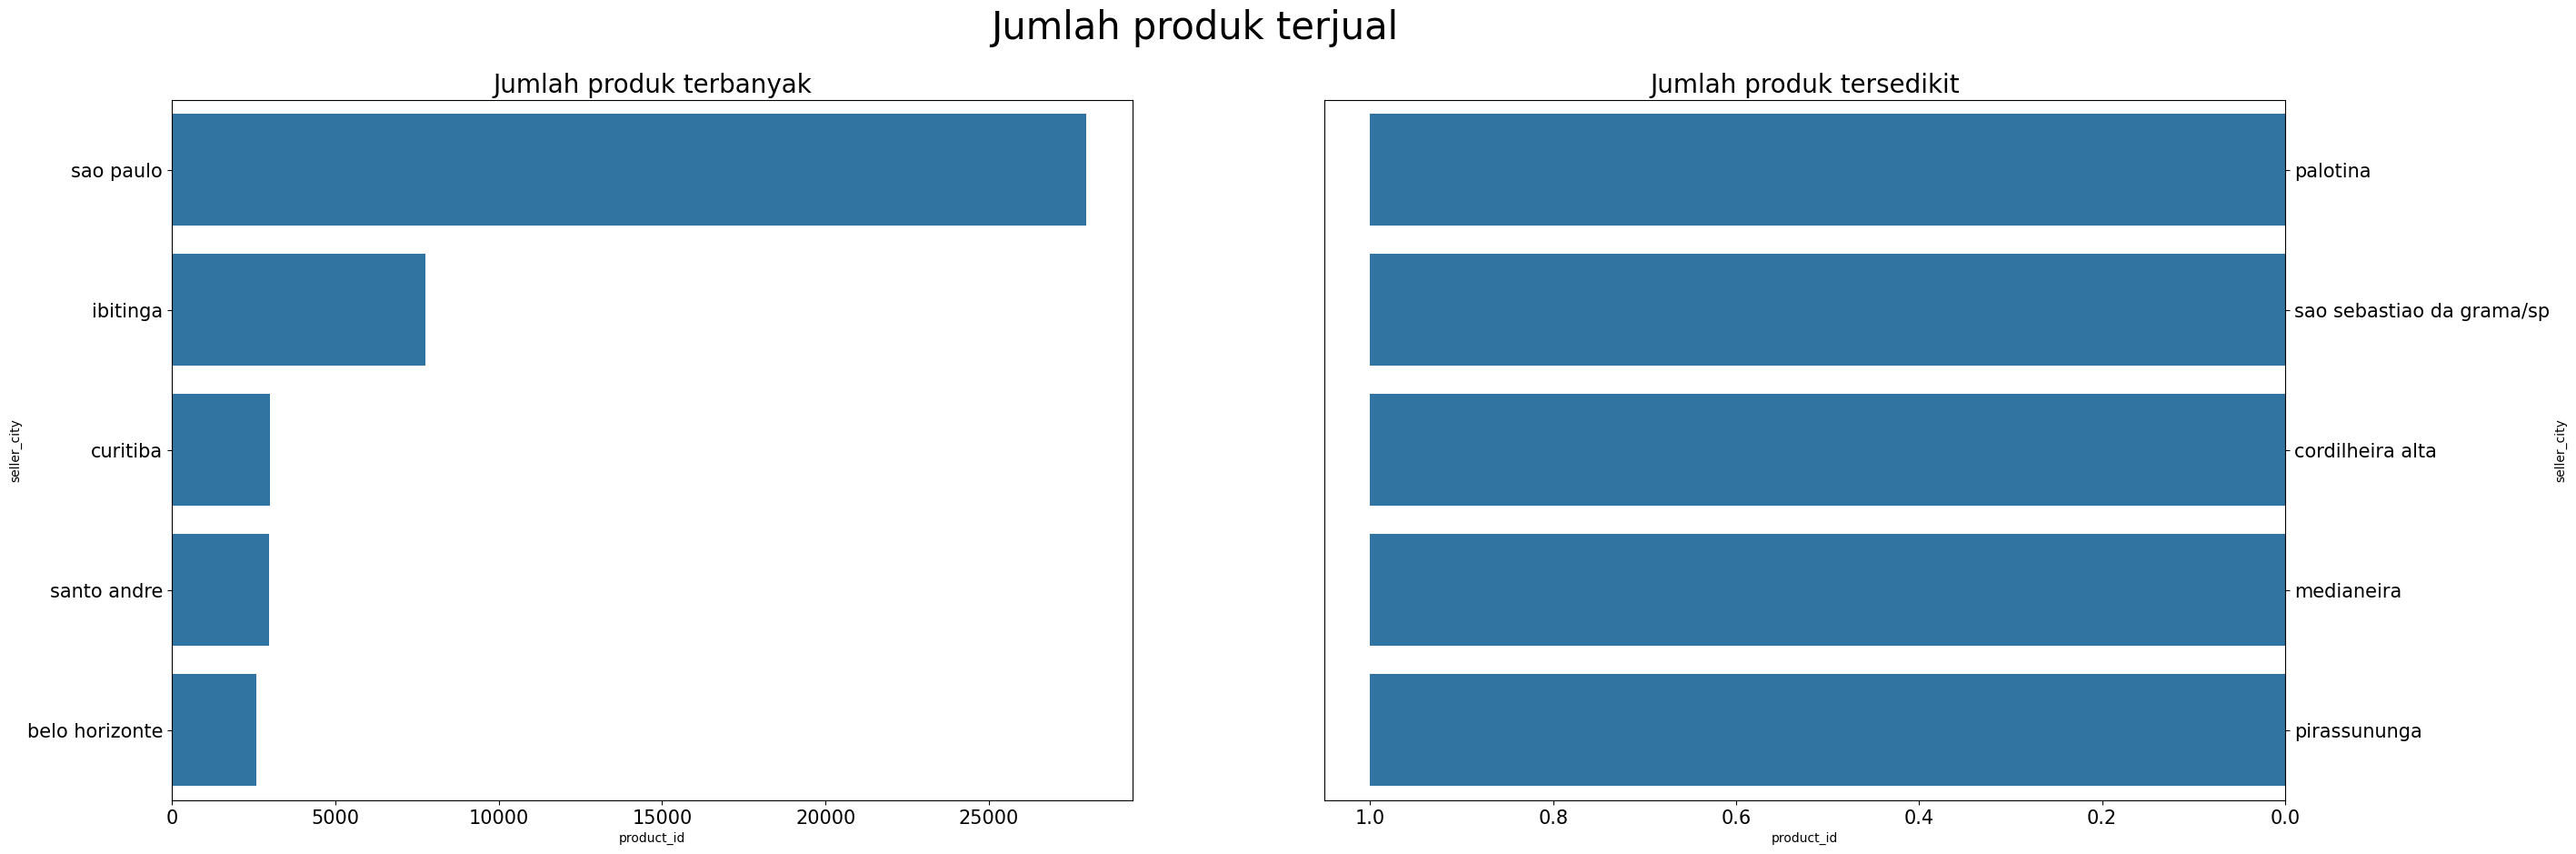

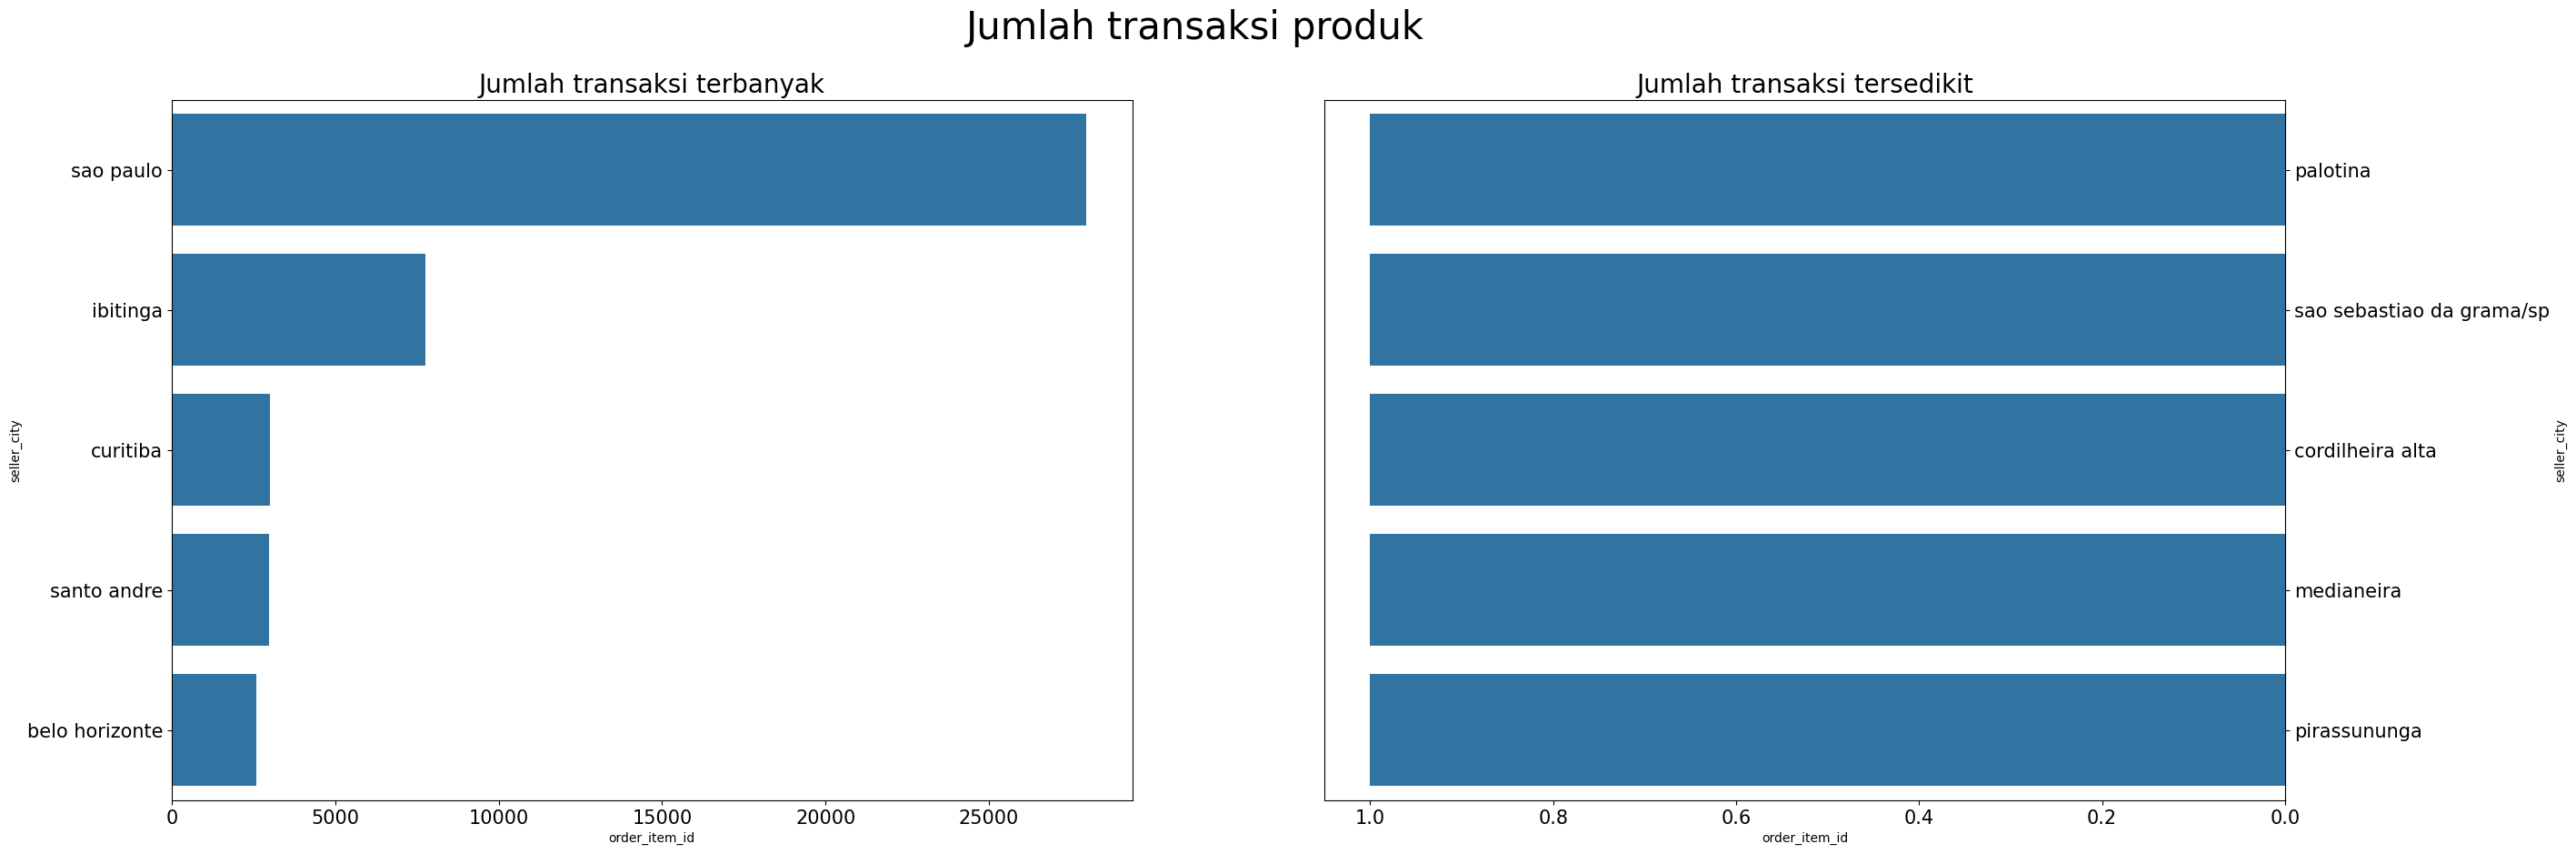

In [65]:
fig, ax = plt.subplots(figsize = (30,10), ncols = 2, nrows = 1)

sns.barplot(
    x = 'price',
    y = 'seller_city',
    data = sum_sellers_df.sort_values(by = 'price', ascending = False).head(5),
    ax = ax[0]
)

ax[0].tick_params(axis = 'x', labelsize = 15)
ax[0].tick_params(axis = 'y', labelsize = 15)
ax[0].set_title('Omset produk tertinggi', loc = 'center', fontsize = 20)

sns.barplot(
    x = 'price',
    y = 'seller_city',
    data = sum_sellers_df.sort_values(by = 'price', ascending = True).head(5),
    ax = ax[1]
)

ax[1].tick_params(axis = 'x', labelsize = 15)
ax[1].tick_params(axis = 'y', labelsize = 15)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title('Omset produk terendah', loc = 'center', fontsize = 20)

plt.suptitle("Omset produk", fontsize=30)
plt.show(fig)

fig, ax = plt.subplots(figsize = (30,10), ncols = 2, nrows = 1)

sns.barplot(
    x = 'product_id',
    y = 'seller_city',
    data = sum_sellers_df.sort_values(by = 'product_id', ascending = False).head(5),
    ax = ax[0]
)

ax[0].tick_params(axis = 'x', labelsize = 15)
ax[0].tick_params(axis = 'y', labelsize = 15)
ax[0].set_title('Jumlah produk terbanyak', loc = 'center', fontsize = 20)

sns.barplot(
    x = 'product_id',
    y = 'seller_city',
    data = sum_sellers_df.sort_values(by = 'product_id', ascending = True).head(5),
    ax = ax[1]
)

ax[1].tick_params(axis = 'x', labelsize = 15)
ax[1].tick_params(axis = 'y', labelsize = 15)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title('Jumlah produk tersedikit', loc = 'center', fontsize = 20)

plt.suptitle("Jumlah produk terjual", fontsize=30)
plt.show(fig)

fig, ax = plt.subplots(figsize = (30,10), ncols = 2, nrows = 1)

sns.barplot(
    x = 'order_item_id',
    y = 'seller_city',
    data = sum_sellers_df.sort_values(by = 'order_item_id', ascending = False).head(5),
    ax = ax[0]
)

ax[0].tick_params(axis = 'x', labelsize = 15)
ax[0].tick_params(axis = 'y', labelsize = 15)
ax[0].set_title('Jumlah transaksi terbanyak', loc = 'center', fontsize = 20)

sns.barplot(
    x = 'order_item_id',
    y = 'seller_city',
    data = sum_sellers_df.sort_values(by = 'order_item_id', ascending = True).head(5),
    ax = ax[1]
)

ax[1].tick_params(axis = 'x', labelsize = 15)
ax[1].tick_params(axis = 'y', labelsize = 15)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title('Jumlah transaksi tersedikit', loc = 'center', fontsize = 20)

plt.suptitle("Jumlah transaksi produk", fontsize=30)
plt.show(fig)

**Insight:**
- bed_bath_table menjadi kategori produk yang paling banyak terjual
- Kota sao paulo menjadi kota yang paling banyak memiliki omset, jumlah produk terjual, dan jumlah transaksi

## Analisis Lanjutan (Opsional)

## Conclusion

Pertanyaan 1
- Penjualan produk setiap kategori memiliki selisih yang cukup besar (tidak merata di setiap kategorinya).
- Insight data kategori produk:
  - Jumlah terjual:
    - Tertinggi: bed_bath_table
    - Terendah: security_and_services

Pertanyaan 2
- Omset, jumlah produk terjual, dan jumlah transaksi cukup timpang antara kota sao paulo dan kota lainnya. Penjual yang berada di sao paulo memiliki omset terbesar diikuti oleh jumlah produk terjual dan jumlah transaksi yang terjadi.
- Insight data kota penjual:
  - Omset:
    - Tertinggi: sao paulo
    - Terendah: floranopolis & resende
  - Jumlah produk terjual:
    - Tertinggi: sao paulo
    - Terendah: palotina, sao sebastiao, cordilheira, medianeira, & pirassununga
  - Jumlah transaksi:
    - Tertinggi: sao paulo
    - Terendah: palotina, sao sebastiao, cordilheira, medianeira, & pirassununga
    
- Saran: dapat mencari distribusi penjualan kategori produk di setiap kota.